In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("csv_pca/psam_p06.csv")
df.head()

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
0,P,2020GQ0000016,9,1,8103,4,6,1006149,15,94,...,15,29,14,1,2,1,15,15,15,1
1,P,2020GQ0000023,9,1,3100,4,6,1006149,33,45,...,34,34,33,57,33,7,59,32,59,57
2,P,2020GQ0000039,9,1,7310,4,6,1006149,79,28,...,78,76,6,74,154,82,5,7,74,80
3,P,2020GQ0000044,9,1,2901,4,6,1006149,135,33,...,135,135,31,134,31,134,136,131,236,237
4,P,2020GQ0000070,9,1,3100,4,6,1006149,25,44,...,45,25,26,45,44,25,44,43,25,5


In [3]:
print(", ".join(df.columns))

RT, SERIALNO, DIVISION, SPORDER, PUMA, REGION, ST, ADJINC, PWGTP, AGEP, CIT, CITWP, COW, DDRS, DEAR, DEYE, DOUT, DPHY, DRAT, DRATX, DREM, ENG, FER, GCL, GCM, GCR, HIMRKS, HINS1, HINS2, HINS3, HINS4, HINS5, HINS6, HINS7, INTP, JWMNP, JWRIP, JWTRNS, LANX, MAR, MARHD, MARHM, MARHT, MARHW, MARHYP, MIG, MIL, MLPA, MLPB, MLPCD, MLPE, MLPFG, MLPH, MLPI, MLPJ, MLPK, NWAB, NWAV, NWLA, NWLK, NWRE, OIP, PAP, RELSHIPP, RETP, SCH, SCHG, SCHL, SEMP, SEX, SSIP, SSP, WAGP, WKHP, WKL, WKWN, WRK, YOEP, ANC, ANC1P, ANC2P, DECADE, DIS, DRIVESP, ESP, ESR, FOD1P, FOD2P, HICOV, HISP, INDP, JWAP, JWDP, LANP, MIGPUMA, MIGSP, MSP, NAICSP, NATIVITY, NOP, OC, OCCP, PAOC, PERNP, PINCP, POBP, POVPIP, POWPUMA, POWSP, PRIVCOV, PUBCOV, QTRBIR, RAC1P, RAC2P, RAC3P, RACAIAN, RACASN, RACBLK, RACNH, RACNUM, RACPI, RACSOR, RACWHT, RC, SCIENGP, SCIENGRLP, SFN, SFR, SOCP, VPS, WAOB, FAGEP, FANCP, FCITP, FCITWP, FCOWP, FDDRSP, FDEARP, FDEYEP, FDISP, FDOUTP, FDPHYP, FDRATP, FDRATXP, FDREMP, FENGP, FESRP, FFERP, FFODP, FGCLP, F

In [3]:
len(np.unique(df.PUMA.values))

265

In [4]:
INCOME_COL = "PINCP"
AGE_COL = "AGEP"

In [5]:
df = df[df[INCOME_COL] != 0.0]

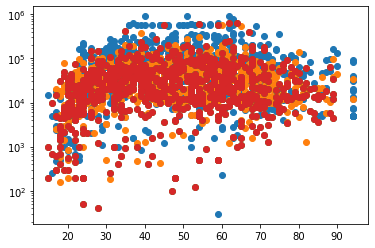

In [6]:
currdf = df[df["PUMA"] == 8103]
plt.scatter(currdf[AGE_COL], currdf[INCOME_COL])

currdf = df[df["PUMA"] == 3100]
plt.scatter(currdf[AGE_COL], currdf[INCOME_COL])

currdf = df[df["PUMA"] == 2901]
plt.scatter(currdf[AGE_COL], currdf[INCOME_COL])

currdf = df[df["PUMA"] == 2901]
plt.scatter(currdf[AGE_COL], currdf[INCOME_COL])

plt.yscale("log")

In [7]:
avg_incomes = []
avg_ages = []
std_incomes = []
std_ages = []

for puma in np.unique(df.PUMA.values):
    currdf = df[df["PUMA"] == puma]
    incomes = currdf[INCOME_COL].values
    avg_incomes.append(np.nanmean(np.log(incomes)))
    std_incomes.append(np.nanstd(np.log(incomes)))
    ages = currdf[AGE_COL].values
    avg_ages.append(np.nanmean(ages))
    std_ages.append(np.nanstd(ages))

/var/folders/c3/_f3tgzn14ylfqqgqhkdntngh0000gn/T/ipykernel_30887/379930171.py:9: RuntimeWarning: invalid value encountered in log
  avg_incomes.append(np.nanmean(np.log(incomes)))
/var/folders/c3/_f3tgzn14ylfqqgqhkdntngh0000gn/T/ipykernel_30887/379930171.py:10: RuntimeWarning: invalid value encountered in log
  std_incomes.append(np.nanstd(np.log(incomes)))


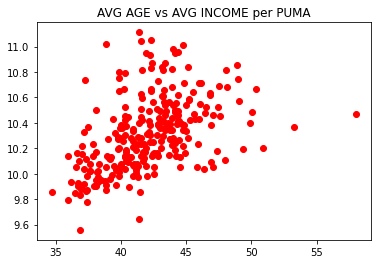

In [8]:
plt.scatter(avg_ages, avg_incomes, color="r")
plt.title("AVG AGE vs AVG INCOME per PUMA")
plt.show()

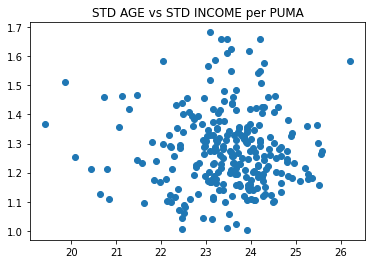

In [9]:
plt.scatter(std_ages, std_incomes)
plt.title("STD AGE vs STD INCOME per PUMA")
plt.show()

In [10]:
import geopandas as gpd

# open file
gdf = gpd.read_file("csv_pca/ipums_puma_2010/ipums_puma_2010.shp")
gdf = gdf[gdf.State == "California"]

gdf['coords'] = gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf['coords'] = [coords[0] for coords in gdf['coords']]

In [11]:
# add NEIGHBORS column
gdf["NEIGHBORS"] = None 
gdf["AVG_INCOME"] = np.zeros(len(gdf))

for index, country in gdf.iterrows():   

    # get 'not disjoint' countries
    neighbors = gdf[~gdf.geometry.disjoint(country.geometry)].PUMA.tolist()

    # remove own name of the country from the list
    neighbors = [ name for name in neighbors if country.PUMA != name ]

    # add names of neighbors as NEIGHBORS value
    gdf.at[index, "NEIGHBORS"] = ", ".join(neighbors)
    
    currdf = df[df["PUMA"] == int(country.PUMA)]
    incomes = currdf[INCOME_COL].values
    incomes = incomes[incomes > 0]
    
    gdf.at[index, "AVG_INCOME"] = np.nanmean(np.log(incomes))

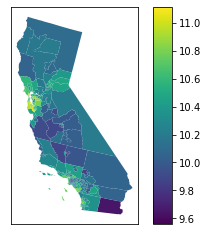

In [93]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure()
ax = fig.add_subplot(111)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="15%", pad=0.2)

gdf.plot(column="AVG_INCOME", ax=ax, legend=True, cax=cax, rasterized=True)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.savefig("../latex/images/example_income.pdf", bbox_inches="tight", dpi=100)

In [14]:
gdf.head()

,GISMATCH,GISJOIN,GEOID,STATEFIP,State,PUMA,Name,geometry,coords,NEIGHBORS,AVG_INCOME
0,600105,G06000105,0600105,06,California,00105,"Alameda County (West)--San Leandro, Alameda & ...","MULTIPOLYGON (((-2258646.530 342733.341, -2258...","(-2255708.308553226, 337119.4151999983)","00106, 00104, 00103, 07502",10.543165
1,600102,G06000102,0600102,06,California,00102,Alameda County (Northwest)--Oakland (Northwest...,"POLYGON ((-2259099.372 353383.127, -2259101.40...","(-2262874.4121307475, 348800.7923726663)","00101, 00104, 00103",10.451802
2,608502,G06008502,0608502,06,California,08502,Santa Clara County (Northwest)--Sunnyvale & Sa...,"POLYGON ((-2246220.131 304622.390, -2246216.04...","(-2252979.300321909, 298995.28979823086)","00108, 08504, 08501, 08507, 08503",11.022806
3,600108,G06000108,0600108,06,California,00108,"Alameda County (Southwest)--Union City, Newark...","MULTIPOLYGON (((-2247215.331 305414.315, -2247...","(-2252983.514190722, 313641.79073848436)","08502, 00107, 08504, 00109",10.648351
4,600107,G06000107,0600107,06,California,00107,Alameda County (Central)--Hayward City PUMA,"POLYGON ((-2244205.948 331582.334, -2244209.13...","(-2248646.030238654, 324694.3438280411)","00108, 00110, 00109, 00106",10.374011


(-2080000.0, -2010000.0)

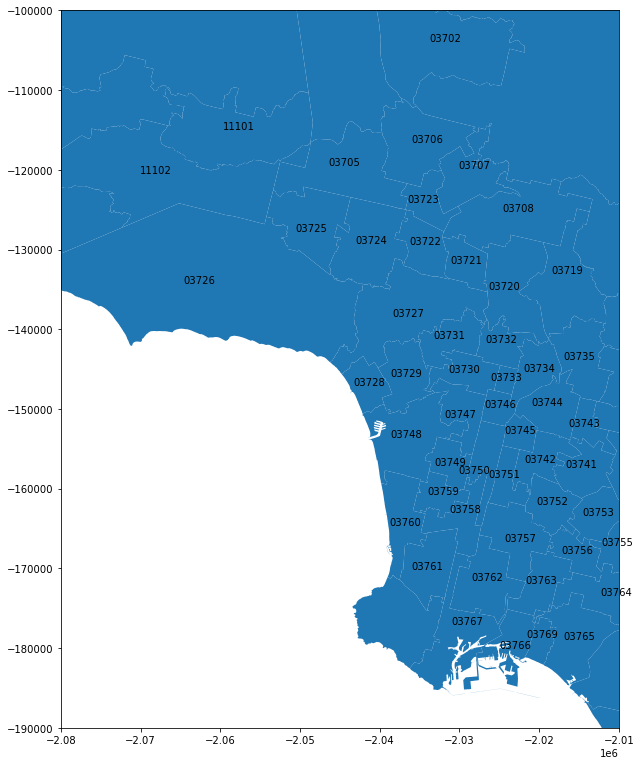

In [29]:
fig = plt.figure(figsize=(10, 30))
ax = fig.add_subplot(111)

gdf.plot(ax = ax)
for idx, row in gdf.iterrows():
    plt.annotate(text=row['PUMA'], xy=row['coords'],
                 horizontalalignment='center')
    
ax.set_ylim((-190000, -100000))
ax.set_xlim((-2080000, -2010000)) 

In [43]:
gdf.PUMA.astype(int)

0        105
1        102
2       8502
3        108
4        107
        ... 
2260    6507
2261    6502
2262    7101
2263    7104
2303    6501
Name: PUMA, Length: 265, dtype: int64

In [51]:
from descartes import PolygonPatch

def plot_puma(axes, gdf, puma_id, fcolor) :
    # plot a country on the provided axes
    puma = gdf[gdf.PUMA.astype(int) == puma_id]
    puma = puma.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': puma[0]['geometry']['type'], \
              'coordinates': puma[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch(namig0, fc=fcolor, ec="black", alpha=0.85, zorder=2 ))

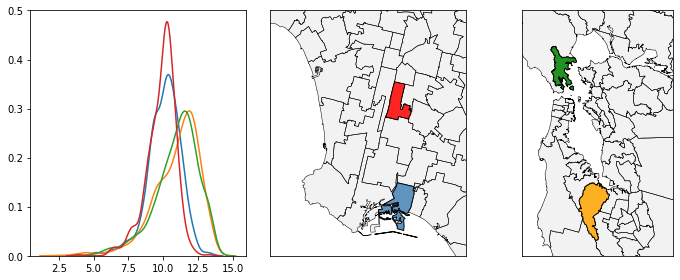

In [92]:
import seaborn as sns

idx1 = 3766
idx2 = 8501
idx3 = 4102
idx4 = 3751


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))


for puma in [idx1, idx2, idx3, idx4]:
    currdf = df[df["PUMA"] == puma]
    incomes = currdf[INCOME_COL].values
    incomes = incomes[incomes > 0]
    sns.kdeplot(np.log(incomes), ax=axes[0])
axes[0].set_ylabel("")

gdf.boundary.plot(ax = axes[1], color="black", lw=0.5)
gdf.plot(ax = axes[1], color="black", alpha=0.05, lw=0.5, rasterized=True)
axes[1].set_ylim((-190000, -140000))
axes[1].set_xlim((-2050000, -2010000)) 
axes[1].get_xaxis().set_visible(False)
axes[1].get_yaxis().set_visible(False)
axes[1].set_yticks([])
axes[1].set_xticks([])


plot_puma(axes[1], gdf, idx1, "steelblue")
plot_puma(axes[1], gdf, idx4, "red")


gdf.boundary.plot(ax = axes[2], color="black", lw=0.5)
gdf.plot(ax = axes[2], color="black", alpha=0.05, lw=0.5, rasterized=True)
axes[2].set_ylim((270000, 400000))
axes[2].set_xlim((-2300000, -2220000)) 
axes[2].set_yticks([])
axes[2].set_xticks([])
axes[2].get_xaxis().set_visible(False)
axes[2].get_yaxis().set_visible(False)

plot_puma(axes[2], gdf, idx2, "orange")
plot_puma(axes[2], gdf, idx3, "green")

plt.tight_layout()
plt.savefig("../latex/images/four_pumas.pdf", bbox_inches="tight", dpi=100)

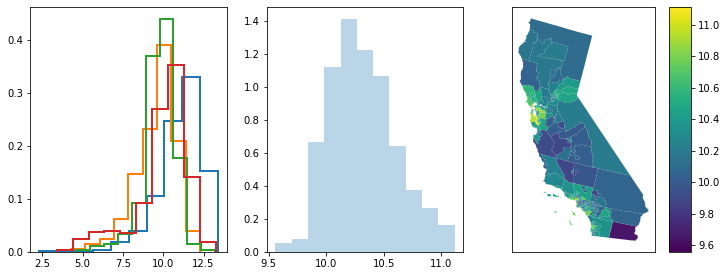

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4.5))

axes[1].hist(avg_incomes, bins="doane", density=True, alpha=0.3)


for puma in [8105, 3746, 2904, 5303]:
    currdf = df[df["PUMA"] == puma]
    incomes = currdf[INCOME_COL].values
    axes[0].hist(np.log(incomes[incomes>0]), histtype='step', density=True, lw=2)
    

ax = axes[-1]
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="15%", pad=0.2)

gdf.plot(column="AVG_INCOME", ax=ax, legend=True, cax=cax, rasterized=True)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# plt.savefig("../latex/images/income_eda.pdf", bbox_inches="tight")

In [15]:
puma2id = {x: i for i, x in enumerate(np.unique(df.PUMA.values))}

In [ ]:
np.random.seed(100)

income_data = []
for puma in np.unique(df.PUMA.values):
    currdf = df[df["PUMA"] == puma]
    inc = np.random.choice(currdf[INCOME_COL].values, 200)
    income_data.append(inc)

In [ ]:
import pickle

income_data = np.array(income_data)
with open("income_data/california_income_subsampled.pickle", "wb") as fp:
    pickle.dump(income_data, fp)

In [ ]:
n = len(np.unique(df.PUMA.values))

neighbors = np.zeros((n, n))
for index, puma in shp.iterrows():  
    row = puma2id[int(puma.PUMA)]
    curr_neigh = [int(x) for x in puma.NEIGHBORS.split(", ")]
    for neigh in curr_neigh:
        col = puma2id[neigh]
        neighbors[row, col] += 1

In [ ]:
with open("income_data/california_puma_neighbors.pickle", "wb") as fp:
    pickle.dump(neighbors, fp)

# compute moran's index

In [43]:
import pickle

with open("income_data/california_income_subsampled.pickle", "rb") as fp:
    data = pickle.load(fp)
    

with open("income_data/california_puma_neighbors.pickle", "rb") as fp:
    neighbors = pickle.load(fp)

In [ ]:
from esda import Moran

In [ ]:
avg_income = np.nanmean(np.log(data), axis=1)
moran = 0

xbar = np.mean(avg_income)
for i in range(avg_income.shape[0]):
    for j in range(avg_income.shape[0]):
        moran += neighbors[i, j] * (avg_income[i] - xbar) * (avg_income[j] - xbar)
        
moran = moran * len(avg_income) / (np.sum(neighbors))
moran = moran / np.sum((avg_income - xbar)**2)

In [ ]:
import libpysal as lps

In [32]:
W = lps.weights.Queen.from_dataframe(gdf)

In [50]:
m = Moran(gdf.AVG_INCOME, W)
m.I

0.5594481512754158

Text(0.5, 0, "Moran's I")

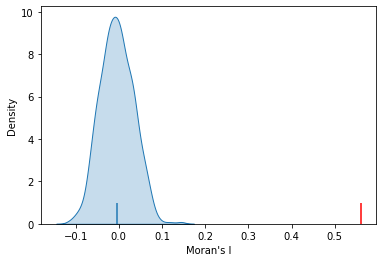

In [52]:
import seaborn as sbn
sbn.kdeplot(m.sim, shade=True)
plt.vlines(m.I, 0, 1, color='r')
plt.vlines(m.EI, 0,1)
plt.xlabel("Moran's I")

# Plot Optimal Lambda

In [53]:
puma2id = {x: i for i, x in enumerate(np.unique(df.PUMA.values))}

In [68]:
with open("income_data/opt_lambda_scaled.pickle", "rb") as fp:
    lam = pickle.load(fp)
    
gdf = gpd.read_file("csv_pca/ipums_puma_2010/ipums_puma_2010.shp")
gdf = gdf[gdf.State == "California"]

# add NEIGHBORS column
gdf["NEIGHBORS"] = None 
gdf["LAM_0"] = np.zeros(len(gdf))
gdf["LAM_1"] = np.zeros(len(gdf))
gdf["LAM_2"] = np.zeros(len(gdf))
gdf["LAM_3"] = np.zeros(len(gdf))


for index, country in gdf.iterrows():   

    # get 'not disjoint' countries
    neighbors = gdf[~gdf.geometry.disjoint(country.geometry)].PUMA.tolist()

    # remove own name of the country from the list
    neighbors = [ name for name in neighbors if country.PUMA != name ]

    # add names of neighbors as NEIGHBORS value
    gdf.at[index, "NEIGHBORS"] = ", ".join(neighbors)
    curr_lam = lam[puma2id[int(country.PUMA)],:]
    curr_lam = curr_lam / np.sum(curr_lam)
    
    for i in range(4):
        gdf.at[index, "LAM_{0}".format(i)] = curr_lam[i]

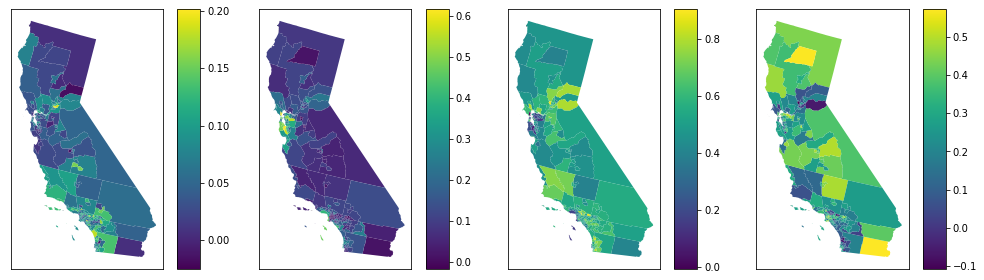

In [168]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14, 4))

for i in range(4):
    ax = axes[i]
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="15%", pad=0.2)
    gdf.plot(column="LAM_{0}".format(i), ax=ax, legend=True, cax=cax, rasterized=True)
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout()
#plt.savefig("../latex/images/income_lam.pdf", bbox_inches="tight", dpi=100)

In [ ]:
# zoom on san francisco

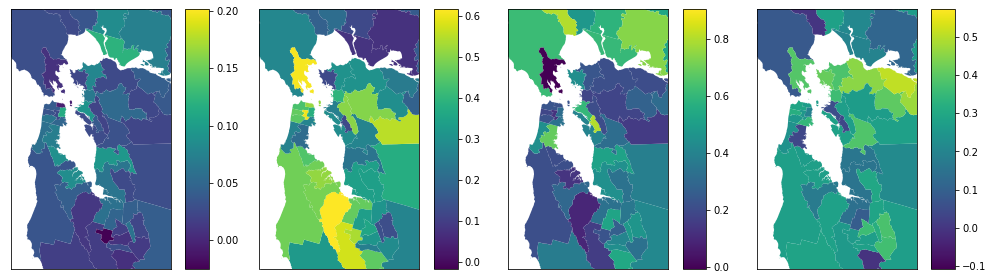

In [119]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14, 4))

for i in range(4):
    ax = axes[i]
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="15%", pad=0.2)
    gdf.plot(column="LAM_{0}".format(i), ax=ax, legend=True, cax=cax, rasterized=True)
    ax.set_ylim((270000, 400000))
    ax.set_xlim((-2300000, -2220000)) 
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.tight_layout()
#plt.savefig("../latex/images/income_lam_sf.pdf", bbox_inches="tight", dpi=100)

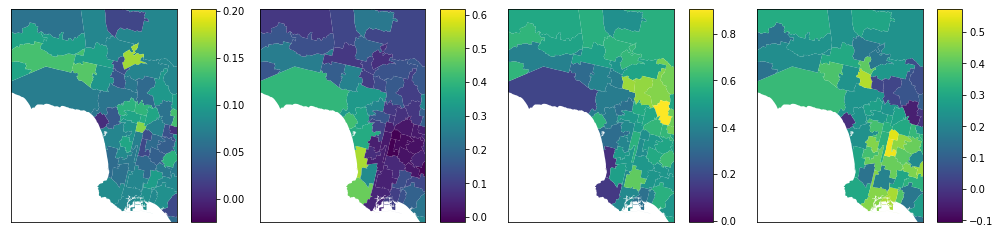

In [167]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14, 5))

for i in range(4):
    ax = axes[i]
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="15%", pad=0.2)
    gdf.plot(column="LAM_{0}".format(i), ax=ax, legend=True, cax=cax, rasterized=True)
    ax.set_ylim((-190000, -100000))
    ax.set_xlim((-2080000, -2010000)) 
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.tight_layout()
#plt.savefig("../latex/images/income_lam_la.pdf", bbox_inches="tight", dpi=100)